<a href="https://colab.research.google.com/github/Mugeni24/uber-fares-powerbi-analysis/blob/main/uber-fares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
uber_df=pd.read_csv('/content/drive/MyDrive/archieves/uber.csv',low_memory=False)

In [ ]:
# Check structure
print(uber_df.shape)
print(uber_df.info())
print(uber_df.describe(include='all'))

(200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
          Unnamed: 0                          key    fare_amount  \
count   2.000000e+05                       200000  200000.000000   
unique           NaN                       200000            NaN   
top              NaN  2009-08-29 02:36:56.0000003            NaN   

In [ ]:
import pandas as pd

# Load the dataset
uber_df = pd.read_csv('/content/drive/MyDrive/archieves/uber.csv', low_memory=False)

# Drop missing values (or handle specifically)
uber_df_cleaned = uber_df.dropna()

# Export for Power BI
uber_df_cleaned.to_csv('uber_fares_cleaned.csv', index=False)

print("Successfully cleaned the data and saved it to 'uber_fares_cleaned.csv'")

Successfully cleaned the data and saved it to 'uber_fares_cleaned.csv'


In [ ]:
# Convert datetime
uber_df_cleaned['pickup_datetime'] = pd.to_datetime(uber_df_cleaned['pickup_datetime'])

# Create new time features
uber_df_cleaned['hour'] = uber_df_cleaned['pickup_datetime'].dt.hour
uber_df_cleaned['day'] = uber_df_cleaned['pickup_datetime'].dt.day
uber_df_cleaned['month'] = uber_df_cleaned['pickup_datetime'].dt.month
uber_df_cleaned['weekday'] = uber_df_cleaned['pickup_datetime'].dt.day_name()
uber_df_cleaned['peak_hour'] = uber_df_cleaned['hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 or 17 <= x <= 19 else 'Off-Peak')

# Save enhanced version
#uber_df_cleaned.to_csv('uber_fares_enhanced.csv', index=False)


/tmp/ipython-input-12-3260873535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_cleaned['pickup_datetime'] = pd.to_datetime(uber_df_cleaned['pickup_datetime'])
/tmp/ipython-input-12-3260873535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df_cleaned['hour'] = uber_df_cleaned['pickup_datetime'].dt.hour
/tmp/ipython-input-12-3260873535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

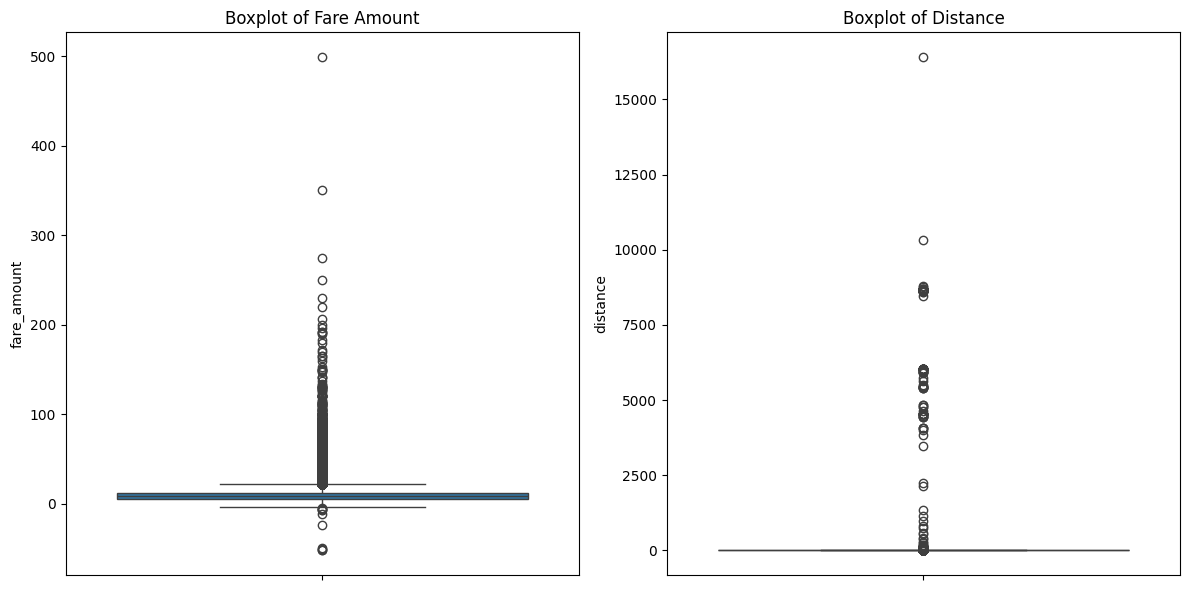

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=uber_df_cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')

plt.subplot(1, 2, 2)
sns.boxplot(y=uber_df_cleaned['distance'])
plt.title('Boxplot of Distance')

plt.tight_layout()
plt.show()

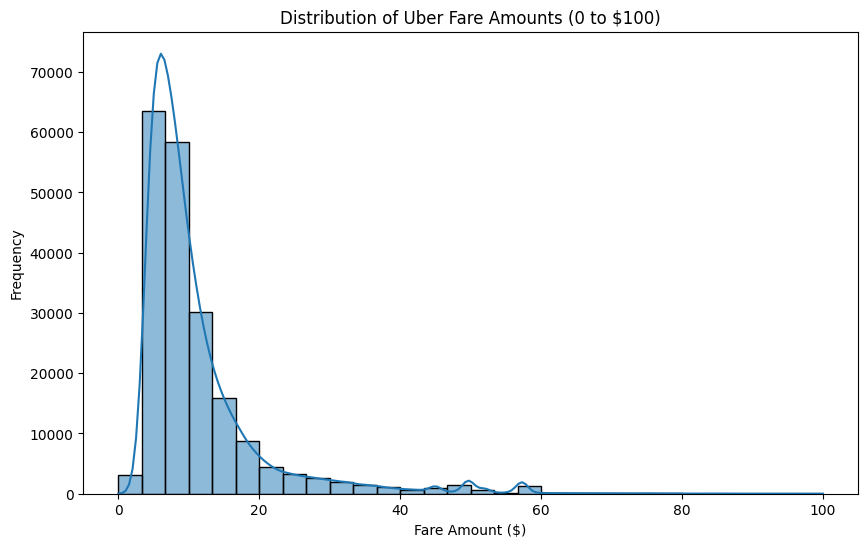

In [ ]:
# Filter out extreme outliers for a more informative visualization
reasonable_fares = uber_df_cleaned[(uber_df_cleaned['fare_amount'] > 0) & (uber_df_cleaned['fare_amount'] <= 100)]

plt.figure(figsize=(10, 6))
sns.histplot(reasonable_fares['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Uber Fare Amounts (0 to $100)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

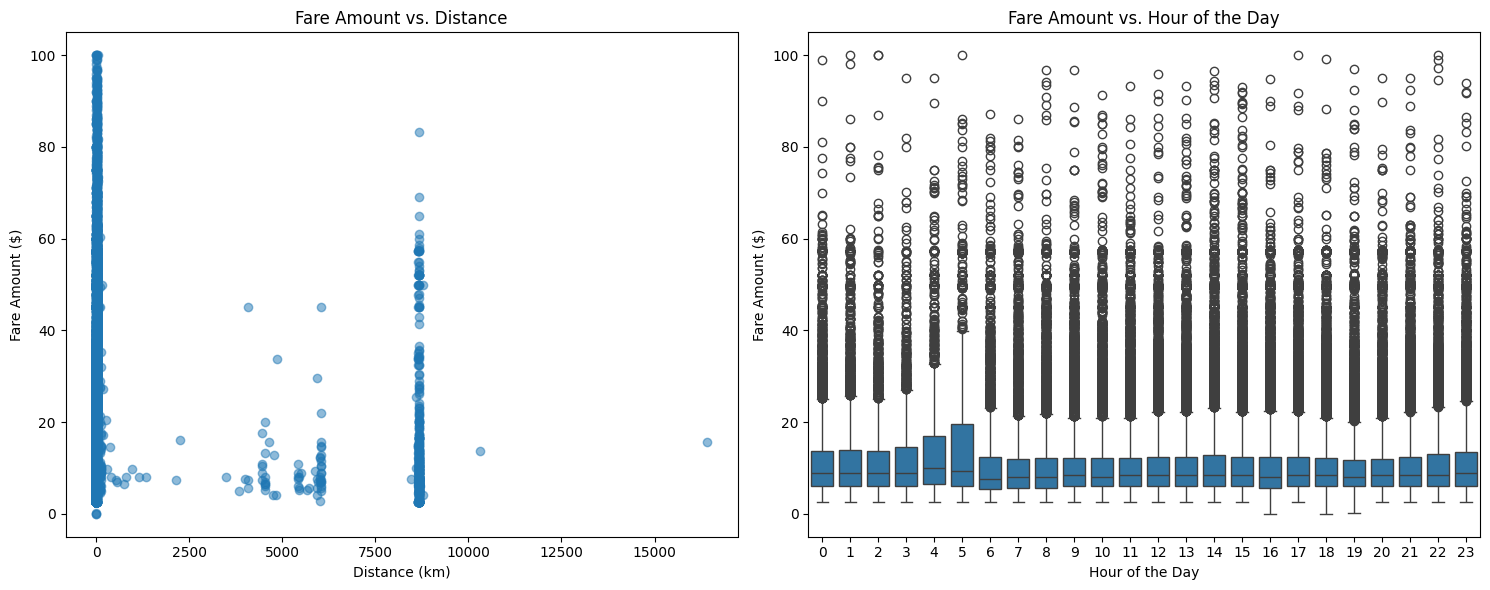

In [ ]:
plt.figure(figsize=(15, 6))

# Fare amount vs. distance
plt.subplot(1, 2, 1)
plt.scatter(reasonable_fares['distance'], reasonable_fares['fare_amount'], alpha=0.5)
plt.title('Fare Amount vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

# Fare amount vs. hour of the day
plt.subplot(1, 2, 2)
sns.boxplot(x=reasonable_fares['hour'], y=reasonable_fares['fare_amount'])
plt.title('Fare Amount vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

In [ ]:
# One-hot encode categorical variables
uber_df_encoded = pd.get_dummies(reasonable_fares, columns=['weekday', 'peak_hour'])

# Display the first few rows of the encoded dataframe
display(uber_df_encoded.head())

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,peak_hour_Off-Peak,peak_hour_Peak
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,...,1.683323,False,False,False,False,True,False,False,False,True
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,...,2.457590,True,False,False,False,False,False,False,True,False
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,...,5.036377,False,True,False,False,False,False,False,True,False
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,...,1.661683,True,False,False,False,False,False,False,False,True
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,...,4.475450,False,False,False,False,True,False,False,False,True


In [ ]:
# Save the enhanced dataset
uber_df_encoded.to_csv('uber_fares_enhanced.csv', index=False)

print("Successfully saved the enhanced dataset to 'uber_fares_enhanced.csv'")

Successfully saved the enhanced dataset to 'uber_fares_enhanced.csv'


In [ ]:
!pip install folium

In [ ]:
import folium

# Create a map centered around New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add a sample of pickup locations to the map
sample_df = reasonable_fares.sample(n=500)  # Use a sample for better performance
for index, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map


In [ ]:
from google.colab import files
files.download('uber_fares_enhanced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Drop rows with missing values
uber_df_clean = uber_df.dropna()

# Remove fares less than or equal to zero
uber_df_clean = uber_df_clean[uber_df_clean['fare_amount'] > 0]

# Remove unrealistic passenger counts (keep 1 to 6)
uber_df_clean = uber_df_clean[(uber_df_clean['passenger_count'] >= 1) & (uber_df_clean['passenger_count'] <= 6)]

# Define plausible NYC longitude and latitude ranges
# NYC approx longitude: -74.05 to -73.75
# NYC approx latitude: 40.63 to 40.85

lon_min, lon_max = -74.05, -73.75
lat_min, lat_max = 40.63, 40.85

# Filter pickup coordinates
uber_df_clean = uber_df_clean[
    (uber_df_clean['pickup_longitude'].between(lon_min, lon_max)) &
    (uber_df_clean['pickup_latitude'].between(lat_min, lat_max))
]

# Filter dropoff coordinates
uber_df_clean = uber_df_clean[
    (uber_df_clean['dropoff_longitude'].between(lon_min, lon_max)) &
    (uber_df_clean['dropoff_latitude'].between(lat_min, lat_max))
]

# Convert pickup_datetime from string to datetime type
uber_df_clean['pickup_datetime'] = pd.to_datetime(uber_df_clean['pickup_datetime'], errors='coerce')

# Drop any rows where datetime conversion failed (NaT)
uber_df_clean = uber_df_clean.dropna(subset=['pickup_datetime'])

# Drop unnecessary columns, like 'Unnamed: 0' and 'key' if not needed
uber_df_clean = uber_df_clean.drop(columns=['Unnamed: 0', 'key'])

# Check the cleaned dataset
print("Cleaned dataset shape:", uber_df_clean.shape)
uber_df_clean.head()

Cleaned dataset shape: (192828, 7)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
uber_df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
